Valores propios: [15.63324958  2.36675042]
Vectores propios:
[[ 0.73349588 -0.50117161]
 [ 0.6796939   0.86534792]]


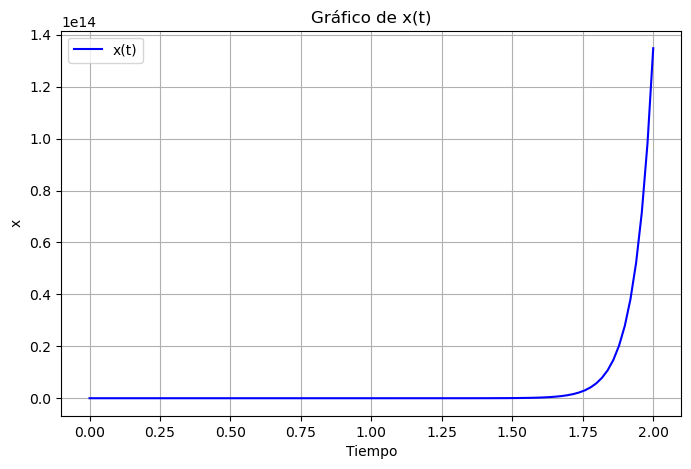

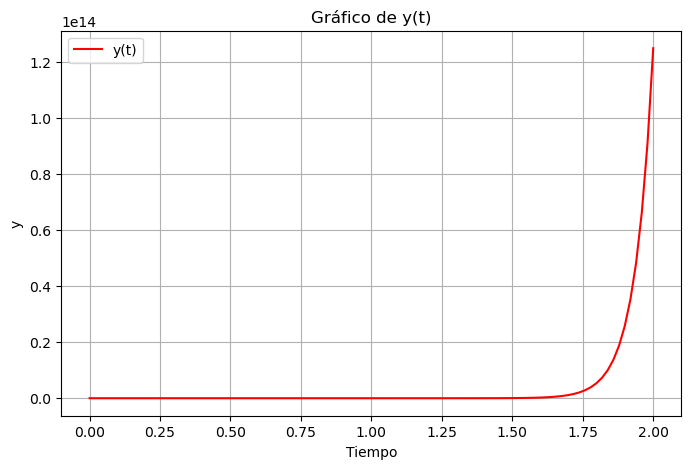

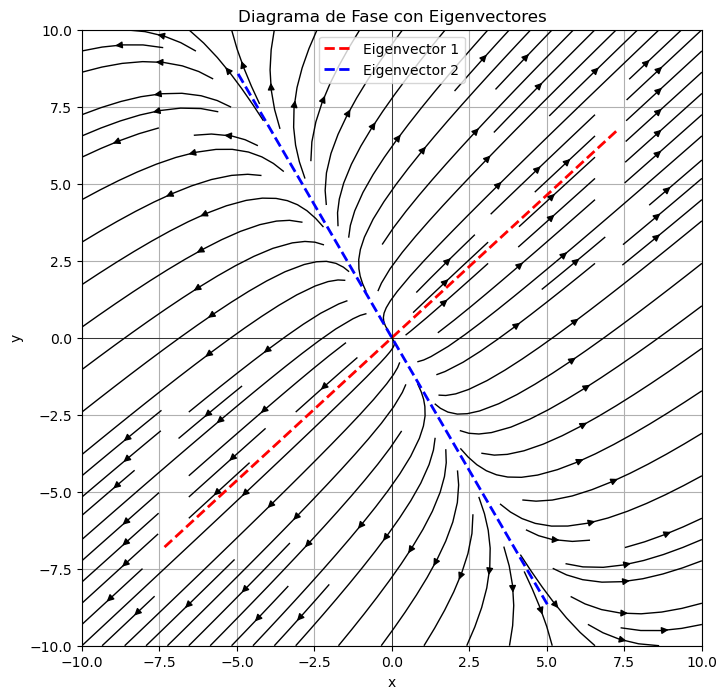

In [1]:
#Análisis Computacional de EDO's
#Estudiantes: Joao Taco, Luis Mejía
#Maestría en Economía del Desarrollo
#Universidad FLACSO

#Caso 1
#Vectores y valores propios reales y diferentes

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Función para actualizar la matriz y las gráficas
def update_matrix(a, b, c, d):
    A = np.array([[a, b], [c, d]])


# Función para actualizar la matriz y las gráficas
def update_matrix(a, b, c, d):
    A = np.array([[a, b], [c, d]])


# Definir la matriz A
A = np.array([[11, 5],
              [8, 7]])

# Calcular valores y vectores propios
eigenvalues, eigenvectors = np.linalg.eig(A)

# Mostrar valores propios
print("Valores propios:", eigenvalues)
print("Vectores propios:")
print(eigenvectors)

# Sistema de ecuaciones
def system(t, z):
    return A @ z  # Producto matricial para dx/dt y dy/dt

# Condiciones iniciales
z0 = [2, 6]  # Vector de estado inicial [x(0), y(0)]

# Tiempo de simulación
t_span = (0, 2) # Intervalo de tiempo (t_inicial, t_final)
t_eval = np.linspace(*t_span, 100) # Puntos de tiempo para la solución

# Resolver sistema de ecuaciones
dyn = solve_ivp(system,t_span, z0, t_eval=t_eval)

# Gráfica temporal de x(t)
plt.figure(figsize=(8, 5))
plt.plot(dyn.t, dyn.y[0], label='x(t)', color='b')
plt.xlabel('Tiempo')
plt.ylabel('x')
plt.legend()
plt.title('Gráfico de x(t)')
plt.grid()
plt.show()

# Gráfica temporal de y(t)
plt.figure(figsize=(8, 5))
plt.plot(dyn.t, dyn.y[1], label='y(t)', color='r')
plt.xlabel('Tiempo')
plt.ylabel('y')
plt.legend()
plt.title('Gráfico de y(t)')
plt.grid()
plt.show()

# Crear una malla de puntos en el plano para el diagrama de fase
x_vals = np.linspace(-10, 10, 20)
y_vals = np.linspace(-10, 10, 20)
X, Y = np.meshgrid(x_vals, y_vals)

# Calcular el campo vectorial en cada punto
DX = A[0, 0] * X + A[0, 1] * Y  # dx/dt = a11 * x + a12 * y
DY = A[1, 0] * X + A[1, 1] * Y  # dy/dt = a21 * x + a22 * y

# Crear la figura para el diagrama de fase
plt.figure(figsize=(8, 8))
plt.streamplot(X, Y, DX, DY, color='black', linewidth=1, arrowsize=1)

# Dibujar eigenvectores
for i in range(2):
    vec = eigenvectors[:, i]  # Obtener el i-ésimo vector propio
    plt.plot([-10 * vec[0], 10 * vec[0]], [-10 * vec[1], 10 * vec[1]], 
             linestyle='dashed', linewidth=2, color=('r' if i == 0 else 'b'),
             label=f'Eigenvector {i+1}')

# Ajustes de la gráfica
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Diagrama de Fase con Eigenvectores")
plt.grid()
plt.legend()
plt.show()

Valores propios: [1.+6.68896751e-09j 1.-6.68896751e-09j]
Vectores propios:
[[0.70710678+4.72981429e-09j 0.70710678-4.72981429e-09j]
 [0.70710678+0.00000000e+00j 0.70710678-0.00000000e+00j]]


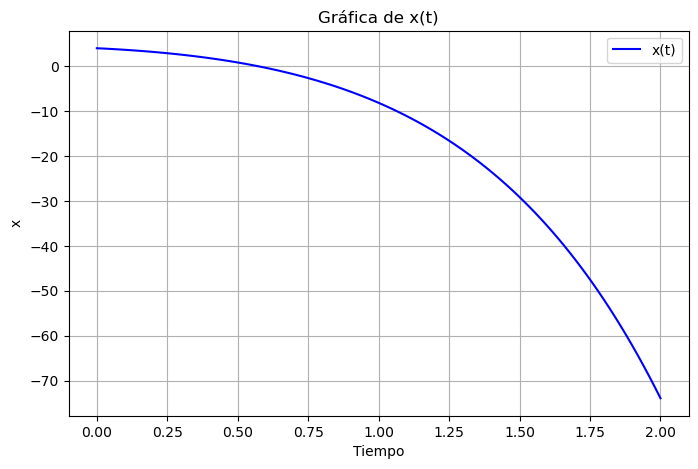

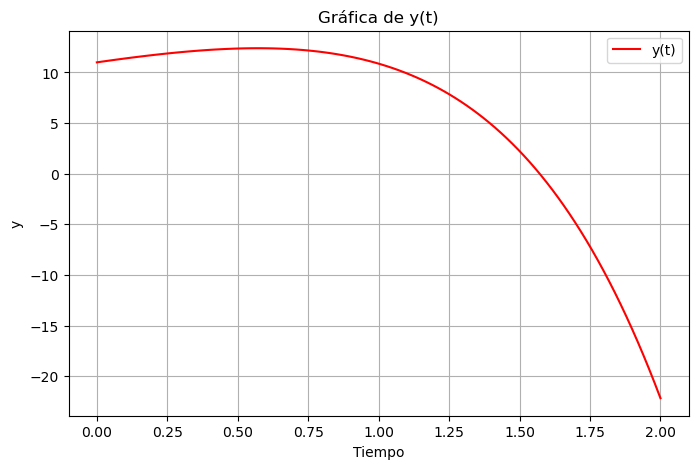

La matriz no tiene valores propios repetidos.


c:\Users\User\anaconda3\Lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\User\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


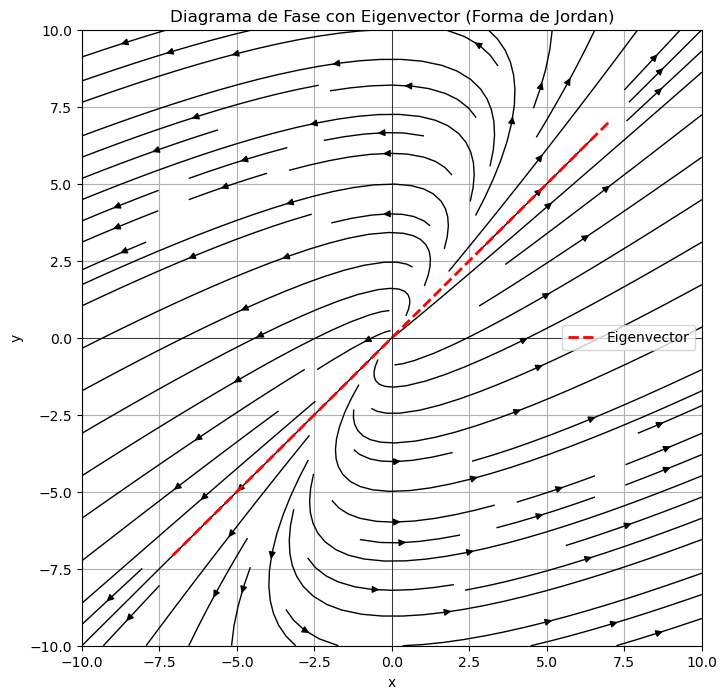

In [2]:
#Caso 2
#Valores y valores propios repetidos(caso Jordan)

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definir la matriz B con valores propios repetidos
B = np.array([[2,-1],
              [1, 0]])

# Calcular valores y vectores propios
eigenvalues, eigenvectors = np.linalg.eig(B)

# Mostrar valores propios
print("Valores propios:", eigenvalues)
print("Vectores propios:")
print(eigenvectors)

# Sistema de ecuaciones
def system(t, z):
    return B @ z  # Producto matricial para dx/dt y dy/dt

# Condiciones iniciales
z0 = [4, 11]  # Vector de estado inicial [x(0), y(0)]

# Tiempo de simulación
t_span = (0, 2)  # Intervalo de tiempo (t_inicial, t_final)
t_eval = np.linspace(*t_span, 100)  # Puntos de tiempo para la solución

# Resolver sistema de ecuaciones diferenciales
dyn = solve_ivp(system, t_span, z0, t_eval=t_eval)

# Gráfica temporal de x(t)
plt.figure(figsize=(8, 5))
plt.plot(dyn.t, dyn.y[0], label='x(t)', color='b')
plt.xlabel('Tiempo')
plt.ylabel('x')
plt.legend()
plt.title('Gráfica de x(t)')
plt.grid()
plt.show()

# Gráfica temporal de y(t)
plt.figure(figsize=(8, 5))
plt.plot(dyn.t, dyn.y[1], label='y(t)', color='r')
plt.xlabel('Tiempo')
plt.ylabel('y')
plt.legend()
plt.title('Gráfica de y(t)')
plt.grid()
plt.show()

# Verificar si hay valores propios repetidos
if len(np.unique(eigenvalues)) < len(eigenvalues):
    print("La matriz tiene valores propios repetidos. Se usará la forma de Jordan.")

    # Calcular la forma de Jordan manualmente
    # Para una matriz 2x2 con un valor propio repetido, la forma de Jordan es:
    J = np.array([[eigenvalues[0], 1],
                  [0, eigenvalues[0]]])

    # La matriz de transformación P se construye con el autovector
    P = np.array([[1, 1],
                  [1, 0]])

    # Inversa de P
    P_inv = np.linalg.inv(P)
else:
    print("La matriz no tiene valores propios repetidos.")
    J = np.diag(eigenvalues)  # Forma diagonal
    P = eigenvectors
    P_inv = np.linalg.inv(P)

# Crear una malla de puntos en el plano para el diagrama de fase
x_vals = np.linspace(-10, 10, 20)
y_vals = np.linspace(-10, 10, 20)
X, Y = np.meshgrid(x_vals, y_vals)

# Calcular el campo vectorial en cada punto
DX = B[0, 0] * X + B[0, 1] * Y  # dx/dt = b11 * x + b12 * y
DY = B[1, 0] * X + B[1, 1] * Y  # dy/dt = b21 * x + b22 * y

# Crear la figura para el diagrama de fase
plt.figure(figsize=(8, 8))
plt.streamplot(X, Y, DX, DY, color='black', linewidth=1, arrowsize=1)

# Dibujar solo el eigenvector 
vec = P[:, 0]  # Obtener el eigenvector
plt.plot([-10 * vec[0], 10 * vec[0]], [-10 * vec[1], 10 * vec[1]], 
         linestyle='dashed', linewidth=2, color='r', label='Eigenvector')

# Ajustes de la gráfica
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Diagrama de Fase con Eigenvector (Forma de Jordan)")
plt.grid()
plt.legend()
plt.show()


Valores propios: [7.5+12.75735082j 7.5-12.75735082j]
Vectores propios:
[[0.09354143+0.34095454j 0.09354143-0.34095454j]
 [0.93541435+0.j         0.93541435-0.j        ]]


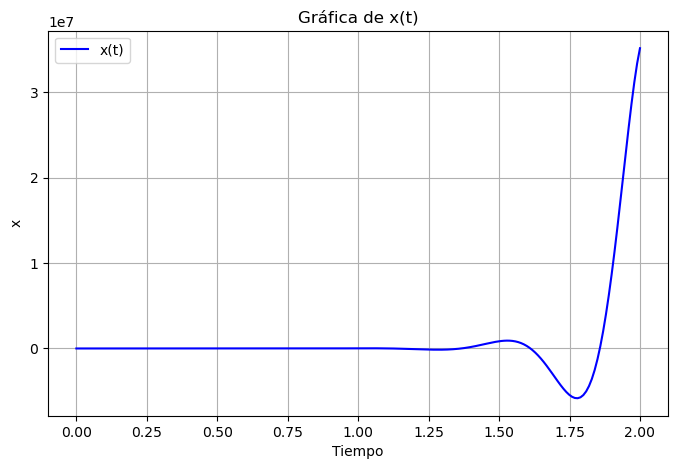

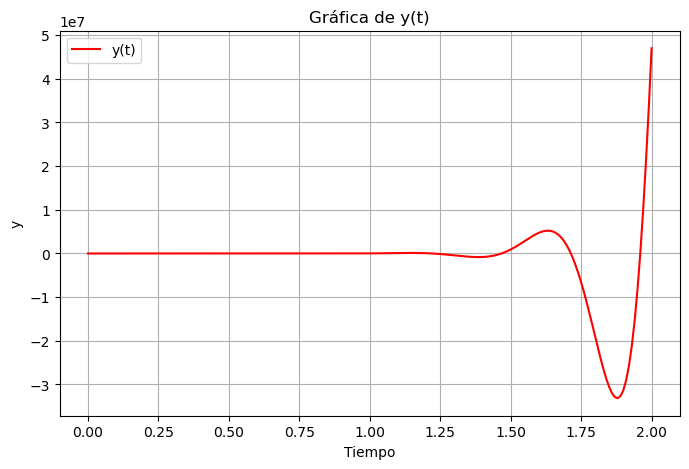

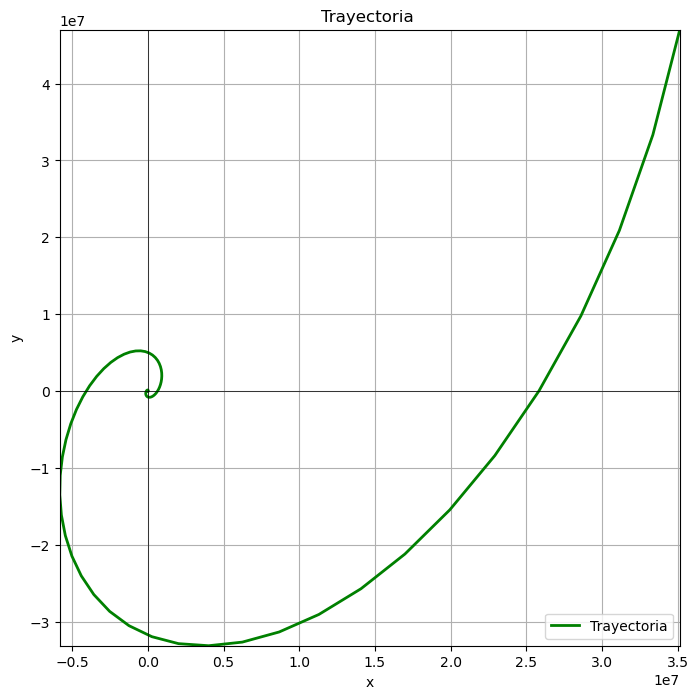

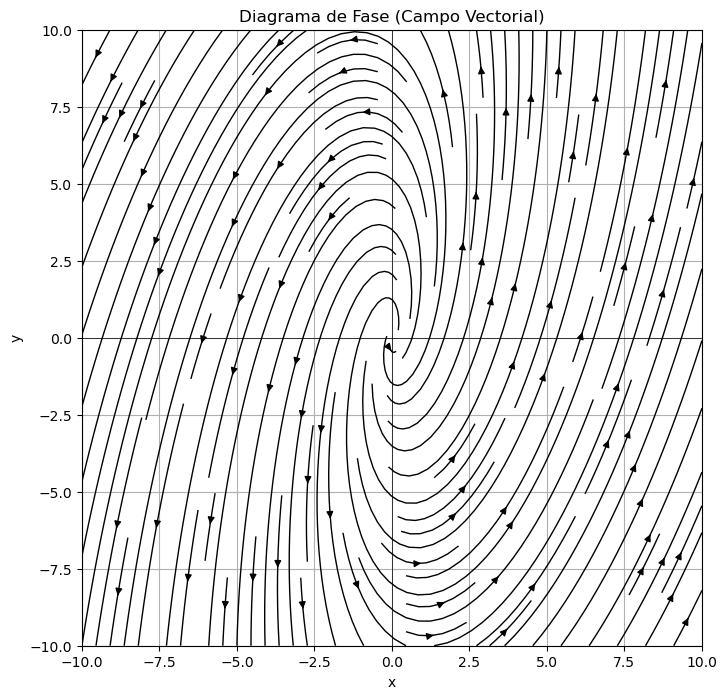

In [5]:
#Caso 3
#Vectores y valores propios complejos

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definir la matriz C con valores propios complejos
C = np.array([[11, -5],
              [35, 4]])

# Calcular valores y vectores propios
eigenvalues, eigenvectors = np.linalg.eig(C)

# Mostrar valores propios
print("Valores propios:", eigenvalues)
print("Vectores propios:")
print(eigenvectors)

# Sistema de ecuaciones
def system(t, z):
    return C @ z  # Producto matricial para dx/dt y dy/dt

# Condiciones iniciales
z0 = [11, 4]  # Vector de estado inicial [x(0), y(0)]

# Tiempo de simulación
t_span = (0, 2)  # Intervalo de tiempo (t_inicial, t_final)
t_eval = np.linspace(*t_span, 200)  # Puntos de tiempo para la solución

# Resolver sistema de ecuaciones diferenciales
dyn = solve_ivp(system, t_span, z0, t_eval=t_eval)

# Gráfica temporal de x(t)
plt.figure(figsize=(8, 5))
plt.plot(dyn.t, dyn.y[0], label='x(t)', color='b')
plt.xlabel('Tiempo')
plt.ylabel('x')
plt.legend()
plt.title('Gráfica de x(t)')
plt.grid()
plt.show()

# Gráfica temporal de y(t)
plt.figure(figsize=(8, 5))
plt.plot(dyn.t, dyn.y[1], label='y(t)', color='r')
plt.xlabel('Tiempo')
plt.ylabel('y')
plt.legend()
plt.title('Gráfica de y(t)')
plt.grid()
plt.show()

# Crear la gráfica de la trayectoria (solo trayectoria)
plt.figure(figsize=(8, 8))
plt.plot(dyn.y[0], dyn.y[1], color='g', label='Trayectoria', linewidth=2)

# Ajustes de la gráfica
plt.axhline(0, color='black', linewidth=0.5)  # Línea horizontal en y=0
plt.axvline(0, color='black', linewidth=0.5)  # Línea vertical en x=0
plt.xlim(min(dyn.y[0]) - 1, max(dyn.y[0]) + 1)  # Ajustar límites según la trayectoria
plt.ylim(min(dyn.y[1]) - 1, max(dyn.y[1]) + 1)  # Ajustar límites según la trayectoria
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trayectoria ")
plt.grid()
plt.legend()
plt.show()

# Crear el diagrama de fase (solo campo vectorial)
x_vals = np.linspace(-10, 10, 20)  # Rango de valores para x
y_vals = np.linspace(-10, 10, 20)  # Rango de valores para y
X, Y = np.meshgrid(x_vals, y_vals)  # Crear una malla de puntos

# Calcular el campo vectorial en cada punto
DX = C[0, 0] * X + C[0, 1] * Y  # dx/dt = c11 * x + c12 * y
DY = C[1, 0] * X + C[1, 1] * Y  # dy/dt = c21 * x + c22 * y

# Crear la figura para el diagrama de fase
plt.figure(figsize=(8, 8))
plt.streamplot(X, Y, DX, DY, color='black', linewidth=1, arrowsize=1, density=1.5)

# Ajustes de la gráfica
plt.axhline(0, color='black', linewidth=0.5)  # Línea horizontal en y=0
plt.axvline(0, color='black', linewidth=0.5)  # Línea vertical en x=0
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Diagrama de Fase (Campo Vectorial)")
plt.grid()
plt.show()
